In [20]:
from typing import TypedDict
from langgraph.graph import START, END, StateGraph

In [17]:
class MoneyState(TypedDict):
    euroAmount : float
    valuedAmount : float
    amountInGhs : float


def getInvestTotalNode(state: MoneyState) -> MoneyState:
    state['valuedAmount'] = state['euroAmount'] * 3.6
    return state

def getLocalValueNode(state: MoneyState) -> MoneyState:
    state['amountInGhs'] = state['valuedAmount'] * 15
    return state
    


In [24]:
builder = StateGraph(MoneyState)
builder.add_node('investment_total', getInvestTotalNode)
builder.add_node('local_value', getLocalValueNode)

builder.add_edge(START, 'investment_total')
builder.add_edge('investment_total', 'local_value')
builder.add_edge('local_value', END)

investGraph = builder.compile()


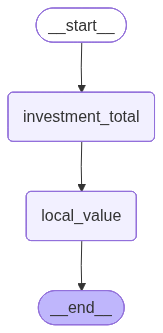

In [28]:
from IPython.display import Image, display
display(Image(investGraph.get_graph().draw_mermaid_png()))

In [29]:
investGraph.invoke({'euroAmount':700})

{'euroAmount': 700, 'valuedAmount': 2520.0, 'amountInGhs': 37800.0}